# Introdução

Esse dataset mostra a relação entre os usuarios e seus habitos de leitura.

As colunas do dataset são:


*   **User_ID**:
         Identificador único de cada pessoa
*   **Age**:     
         Idade de cada pessoa
*   **Gender**:        
         Gênero de cada pessoa
*   **Favorite_Book_Genre**
         O tipo de livro favoritos das pessoas; Ficção, Fantasia
*   **Weekly_Reading_time**
         Tempo médio (em horas) gasto lendo por semana
*   **Mood_Impact**
         Feedback do humor pós leitura (positivo, neutro, negativo)
      




# Importando o CSV

A importação foi direto da API do kagglehub para que o codigo seja facilmente reproduzido em qualquer maquina

In [ ]:
import kagglehub

path = kagglehub.dataset_download("hanaksoy/reading-habits-and-mood-impact-dataset")

print("Path to dataset files:", path)

100%|██████████| 797/797 [00:00<00:00, 401kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hanaksoy/reading-habits-and-mood-impact-dataset/versions/1


# Carregando o dataset e lendo as primeiras linhas

Só mostrando a estrutura do dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

file_path = '/root/.cache/kagglehub/datasets/hanaksoy/reading-habits-and-mood-impact-dataset/versions/1/sleep and psychological effects.csv'
df = pd.read_csv(file_path)

df.head()

,User_ID,Age,Gender,Favorite_Book_Genre,Weekly_Reading_Time(hours),Mood_Impact
0,1,24,f,Fiction,6,Positive
1,2,32,m,Science,2,Neutral
2,3,18,f,Romance,8,Positive
3,4,45,m,History,3,Neutral
4,5,29,f,Fantasy,10,Positive


# Análise dos dados das tabelas

Aqui vamos "ler" os dados para ver o comportamento das informações dentro do csv


Análise da distribuição de idade dos participantes

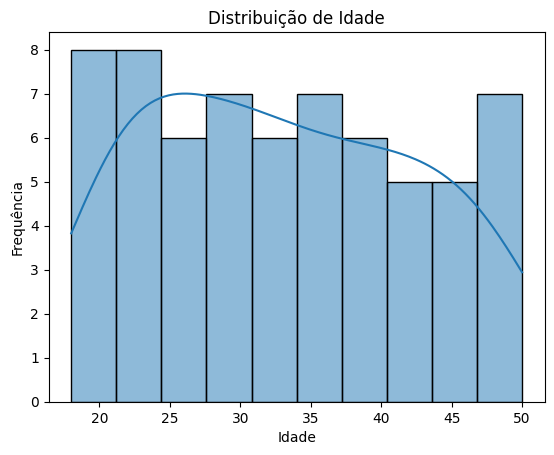

In [ ]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Análise da distribuição de gênero dos participantes

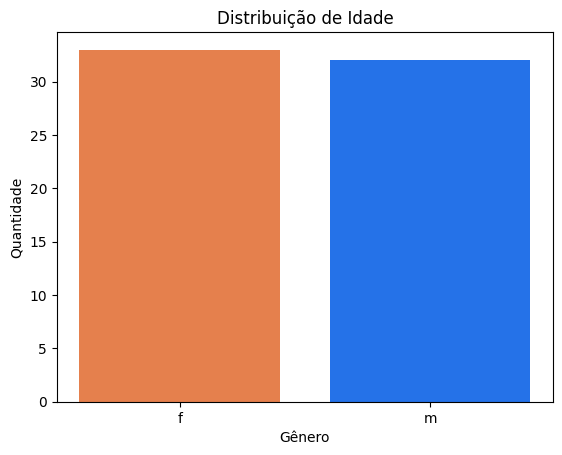

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title('Distribuição de Idade')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.bar('m', df['Gender'].value_counts()['m'], color='#2572e8')
plt.bar('f', df['Gender'].value_counts()['f'], color='#e5804d')
plt.show()

# Hábitos de Leitura

Análise dos hábitos de leitura dos participantes

Distribuição dos livros favoritos dos usuários

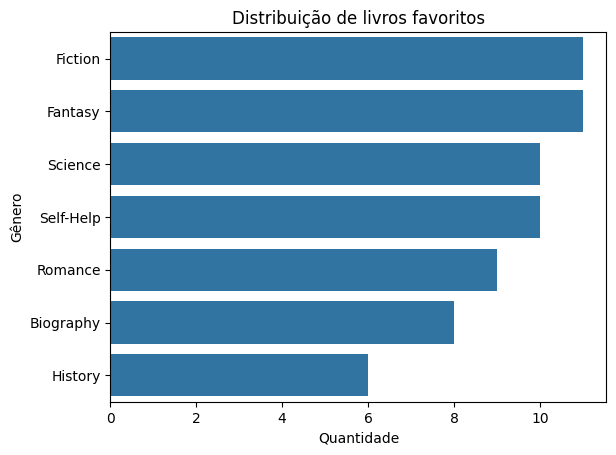

In [ ]:
sns.countplot(y='Favorite_Book_Genre', data=df, order=df['Favorite_Book_Genre'].value_counts().index)
plt.title('Distribuição de livros favoritos')
plt.xlabel('Quantidade')
plt.ylabel('Gênero')
plt.show()

Tempo médio de leitura durante a semana, agrupado por frequência

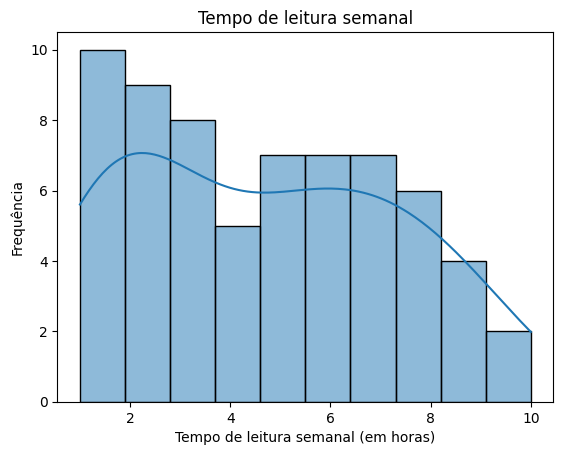

In [ ]:
sns.histplot(df['Weekly_Reading_Time(hours)'], bins=10, kde=True)
plt.title('Tempo de leitura semanal')
plt.xlabel('Tempo de leitura semanal (em horas)')
plt.ylabel('Frequência')
plt.show()

Distribuição do impacto no humor por causa da leitura

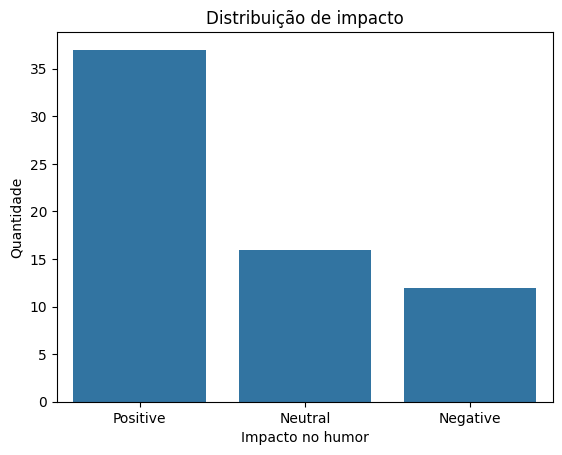

In [ ]:
sns.countplot(x='Mood_Impact', data=df)
plt.title('Distribuição de impacto')
plt.xlabel('Impacto no humor')
plt.ylabel('Quantidade')
plt.show()

# Análise de correlação


Análisar se existe alguma correlação entre os valores numéricos do nosso dataset


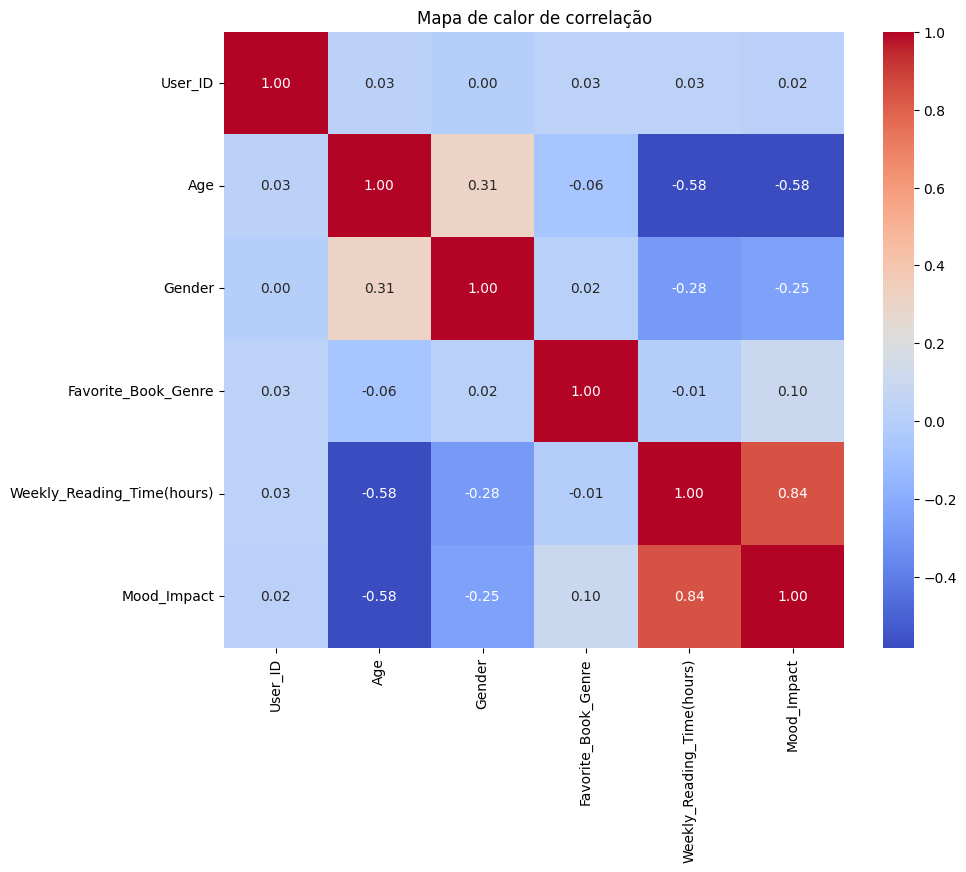

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Favorite_Book_Genre'] = le.fit_transform(df['Favorite_Book_Genre'])
df['Mood_Impact'] = le.fit_transform(df['Mood_Impact'])

numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlação')
plt.show()

# Modelo Predicativo

Agora a construção de um modelo para tentar prever o impacto no humor baseado em outras caracteristicas

In [ ]:
X = df.drop(columns=['User_ID', 'Mood_Impact'])
y = df['Mood_Impact']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisão", accuracy)
print("Matriz de Confusão:")
print(conf_matrix)
print(y_pred)

Precisão 0.7692307692307693
Matriz de Confusão:
[[1 1 0]
 [2 2 0]
 [0 0 7]]
[0 2 2 1 0 2 2 0 1 2 1 2 2]
